In [6]:
import numpy as np
import matplotlib.pyplot as plt
from mikeio import Mesh

meshfilename = r"../tests/testdata/odense_rough.mesh"
msh = Mesh(meshfilename)
msh

Mesh
Number of elements: 654
Number of nodes: 399
Projection: UTM-33

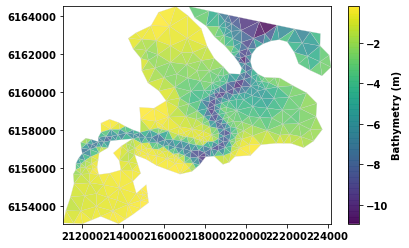

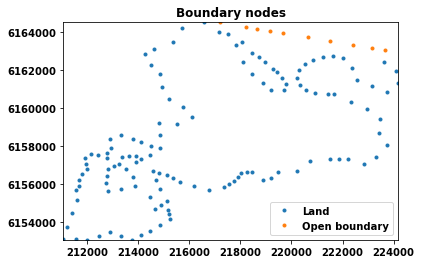

In [5]:
msh.plot()
msh.plot_boundary_nodes(boundary_names=['Land','Open boundary'])

# Convert mesh to shapely
Convert mesh to [shapely](https://shapely.readthedocs.io/en/latest/manual.html) MultiPolygon object, requires that the `shapely` library is installed.

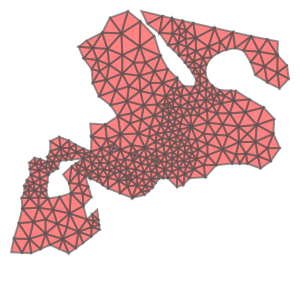

In [8]:
mp = msh.to_shapely()
mp

Now a lot of methods are available

In [9]:
mp.area

68931409.58160606

In [10]:
mp.bounds

(211068.501175313, 6153077.66681803, 224171.617336507, 6164499.42751662)

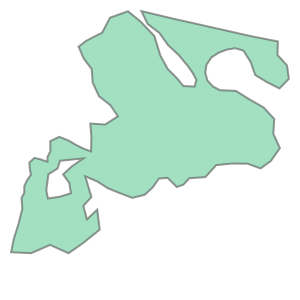

In [11]:
domain = mp.buffer(0)
domain

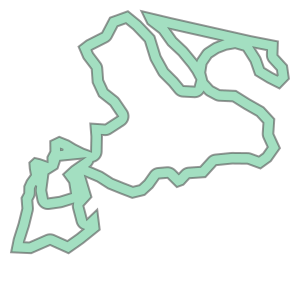

In [12]:
open_water = domain.buffer(-500)

coastalzone = domain - open_water
coastalzone

Find if points are inside the domain

In [13]:
from shapely.geometry import Point

p1 = Point(216000, 6162000)
p2 = Point(220000, 6156000)
print(mp.contains(p1))
print(mp.contains(p2))

True
False


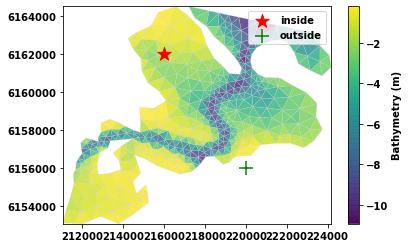

In [14]:
import matplotlib.pyplot as plt
msh.plot()
plt.scatter(p1.x,p1.y,marker="*",s=200,c="red",label="inside")
plt.scatter(p2.x,p2.y,marker="+",s=200,c="green",label="outside")
plt.legend()

# Subset mesh
Select only elements with more than 3m depth. Plot these elements. 

In [3]:
zc = msh.element_coordinates[:,2]

In [4]:
elem_ids = msh.element_ids[zc<-3]

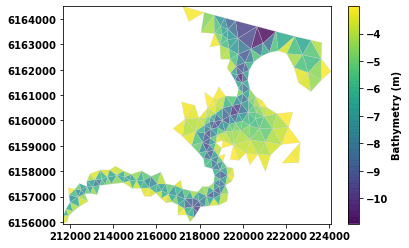

In [5]:
msh.plot(element_ids=elem_ids)

# Change z values and boundary code
Assume that we want to have a minimum depth of 2 meters and change the open boundary (code 2) to a closed one (code 1). 

In [7]:
print(f'max z before: {msh.node_coordinates[:,2].max()}')
zc = msh.node_coordinates[:,2]
zc[zc>-2] = -2
msh.set_z(zc)
print(f'max z after: {msh.node_coordinates[:,2].max()}')

max z before: -0.200000002980232
max z after: -2.0


In [8]:
print(f'valid codes before: {msh.valid_codes}')
c = msh.codes
c[c==2] = 1
msh.set_codes(c)
print(f'valid codes after: {msh.valid_codes}')

valid codes before: [0, 1, 2]
valid codes after: [0, 1]


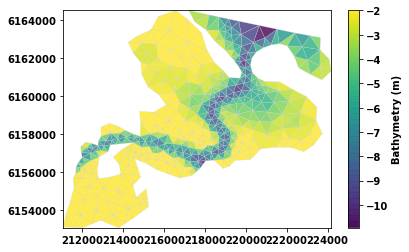

In [9]:
msh.plot()